In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
x = np.linspace(0,0.3,1000)

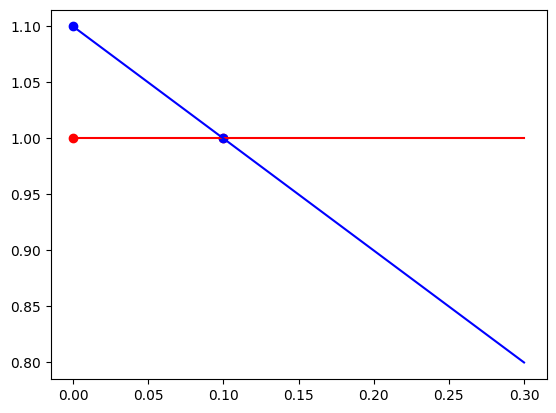

In [15]:
w1 = (1,0)
w2 = (1.1, -1)
y1 = w1[0]*1 + w1[1]*x
y2 = w2[0]*1 + w2[1]*x
plt.plot(x,y1,color = "red")
plt.plot(x,y2,color = "blue")

plt.scatter(0,1,color = "red")
plt.scatter(0.1,1,color = "red")

plt.scatter(0,1.1,color = "blue")
plt.scatter(0.1,1,color = "blue")


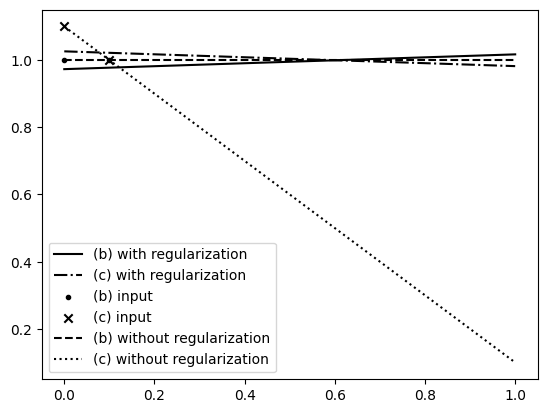

In [33]:


x = np.linspace(0,1,1000)
w1 = (0.973,0.044)
w2 = (1.026,-0.044)
y1 = w1[0]*1 + w1[1]*x
y2 = w2[0]*1 + w2[1]*x
plt.plot(x,y1,label = "(b) with regularization",color = "black")
plt.plot(x,y2,label = "(c) with regularization",ls = "-.",color = "black")

plt.scatter(0,1,color = "black", marker = ".",label = "(b) input")
plt.scatter(0.1,1,color = "black", marker = ".")

plt.scatter(0,1.1,color = "black", marker = "x",label = "(c) input")
plt.scatter(0.1,1,color = "black", marker = "x")

w1 = (1,0)
w2 = (1.1, -1)
y1 = w1[0]*1 + w1[1]*x
y2 = w2[0]*1 + w2[1]*x
plt.plot(x,y1,color = "black",ls = "--",label = "(b) without regularization")
plt.plot(x,y2,color = "black",ls = ":",label = "(c) without regularization")
plt.legend()

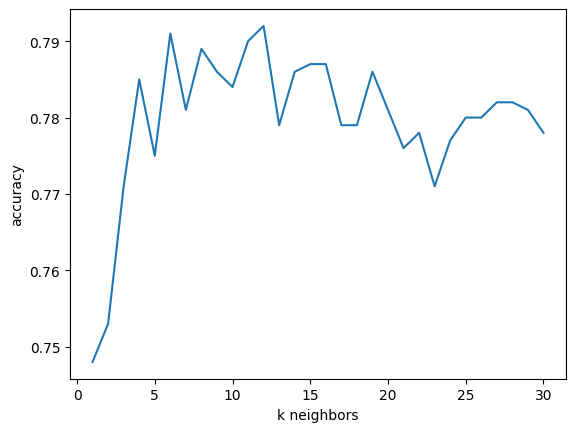

best # of neighbors k: 12
best cross validation accuracy: 0.792
test accuracy: 0.7545454545454545


In [20]:
import numpy as np
import matplotlib.pyplot as plt


def load_knn_data():
    test_inputs = np.genfromtxt('knn-dataset/test_inputs.csv', delimiter=','),
    test_labels = np.genfromtxt('knn-dataset/test_labels.csv', delimiter=','),
    train_inputs = np.genfromtxt('knn-dataset/train_inputs.csv', delimiter=','),
    train_labels = np.genfromtxt('knn-dataset/train_labels.csv', delimiter=','),
    return train_inputs, train_labels, test_inputs, test_labels


'''
This function implements the KNN classifier to predict the label of a data point. 
Measure distances with the Euclidean norm (L2 norm).  
When there is a tie between two (or more) labels, break the tie by choosing any label.

Inputs:
    **x**: input data point for which we want to predict the label (numpy array of M features)
    **inputs**: matrix of data points in which neighbors will be found (numpy array of N data points x M features)
    **labels**: vector of labels associated with the data points  (numpy array of N labels)
    **k_neighbors**: # of nearest neighbors that will be used
Outputs:
    **predicted_label**: predicted label (integer)
'''   
def predict_knn(x, inputs, labels, k_neighbors):
    predicted_label = 0
    ########
    # TO DO:
    try:
        N = inputs.shape[0]
    except:
        N = inputs[0].shape[0]
        inputs = inputs[0]
        labels = labels[0]
    dist_arr = np.zeros((N,))
    for i in range(0,N):
        dist_arr[i] = np.sum((x - inputs[i])**2)
    # sorted_dist_arr = sorted(dist_arr,reverse=False)
    sorted_idx = sorted(list(range(len(dist_arr))),key = lambda k:dist_arr[k],reverse=False)
   
    neighbors = sorted_idx[:k_neighbors]
    label_of_neighbor = [labels[k] for k in neighbors]

    neighbor_labels,cnt = np.unique(label_of_neighbor,return_counts=True)
    predicted_label = neighbor_labels[np.argmax(cnt)]
    ########
    return predicted_label



'''
This function evaluates the accuracy of the KNN classifier on a dataset. 
The dataset to be evaluated consists of (inputs, labels). 
The dataset used to find nearest neighbors consists of (train_inputs, train_labels).

Inputs:
   **inputs**: matrix of input data points to be evaluated (numpy array of N data points x M features)
   **labels**: vector of target labels for the inputs (numpy array of N labels)
   **train_inputs**: matrix of input data points in which neighbors will be found (numpy array of N' data points x M features)
   **train_labels**: vector of labels for the training inputs (numpy array of N' labels)
   **k_neighbors**: # of nearest neighbors to be used (integer)
Outputs:
   **accuracy**: percentage of correctly labeled data points (float)
'''
def eval_knn(inputs, labels, train_inputs, train_labels, k_neighbors):
    accuracy = 0
    ########
    # TO DO:
    try:
        N = inputs.shape[0]
    except:
        N = inputs[0].shape[0]
        inputs = inputs[0]
        labels = labels[0]
        train_inputs = train_inputs[0]
        train_labels = train_labels[0]
    num_correct = 0
    for i in range(N):
        x = inputs[i]
        x_label = labels[i]
        x_label_predicted = predict_knn(x,train_inputs,train_labels,k_neighbors)
        if x_label_predicted == x_label:
            num_correct+=1
        
        # for debugging
        # else :
        #     print("true label : " + str(x_label))
        #     print("predicted label : " + str(x_label_predicted))
        #     print("closest distance : " + str(dist1) + ", seconde closest distance : " + str(dist2))
    
    accuracy = num_correct/N
    ########
    return accuracy


'''
This function performs k-fold cross validation to determine the best number of neighbors for KNN.
        
Inputs:
    **k_folds**: # of folds in cross-validation (integer)
    **hyperparameters**: list of hyperparameters where each hyperparameter is a different # of neighbors (list of integers)
    **inputs**: matrix of data points to be used when searching for neighbors (numpy array of N data points by M features)
    **labels**: vector of labels associated with the inputs (numpy array of N labels)
Outputs:
    **best_hyperparam**: best # of neighbors for KNN (integer)
    **best_accuracy**: accuracy achieved with best_hyperparam (float)
    **accuracies**: vector of accuracies for the corresponding hyperparameters (numpy array of floats)
'''
def cross_validation_knn(k_folds, hyperparameters, inputs, labels):
    best_hyperparam = 0
    best_accuracy = 0
    accuracies = np.zeros(len(hyperparameters))
    ########
    # TO DO:
    inputs = inputs[0]
    labels = labels[0]
    try:
        N = inputs.shape[0]
    except:
        N = inputs[0].shape[0]
        inputs = inputs[0]
        labels = labels[0]
    for j in range(len(hyperparameters)):
        tmp_acc = np.zeros(k_folds)
        for i in range(k_folds):
            valid_sets = inputs[i*N//k_folds:(i+1) * N//k_folds]
            valid_label_sets = labels[i*N//k_folds:(i+1) * N//k_folds]
            input_sets = np.concatenate((inputs[:i*N//k_folds],inputs[(i+1)*N//k_folds:]),axis = 0)
            input_label_sets = np.concatenate((labels[:i*N//k_folds],labels[(i+1)*N//k_folds:]),axis = 0)
            tmp_acc[i] = eval_knn(valid_sets,valid_label_sets,input_sets,input_label_sets,hyperparameters[j])
        accuracies[j] = np.mean(tmp_acc)
    idx = np.argmax(accuracies)
    best_accuracy = accuracies[idx]
    best_hyperparam = hyperparameters[idx]
    ########
    return best_hyperparam, best_accuracy, accuracies


'''
This function plots the KNN accuracies for different # of neighbors (hyperparameters) based on cross validation

Inputs:
    **accuracies**: vector of accuracies for the corresponding hyperparameters (numpy array of floats)
    **hyperparams**: list of hyperparameters where each hyperparameter is a different # of neighbors (list of integers)
'''
def plot_knn_accuracies(accuracies, hyperparams):
    plt.plot(hyperparams, accuracies)
    plt.ylabel('accuracy')
    plt.xlabel('k neighbors')
    plt.show()


def debugg():
    # load data
    train_inputs, train_labels, test_inputs, test_labels = load_knn_data()
    # print(train_inputs)
    # predict_knn(test_inputs[0][0],train_inputs[0],train_labels[0],10)
    # eval_knn(test_inputs[0],test_labels[0],train_inputs[0],train_labels[0],1)

    # number of neighbors to be evaluated by cross validation
    hyperparams = range(1,31)
    k_folds = 10

    # use k-fold cross validation to find the best # of neighbors for KNN
    best_k_neighbors, best_accuracy, accuracies = cross_validation_knn(k_folds, hyperparams, train_inputs[0], train_labels[0])

    # plot results
    # plot_knn_accuracies(accuracies, hyperparams)
    plt.plot(hyperparams, accuracies)
    plt.ylabel('accuracy')
    plt.xlabel('k neighbors')
    # plt.show()
    print('best # of neighbors k: ' + str(best_k_neighbors))
    print('best cross validation accuracy: ' + str(best_accuracy))
    
    # evaluate with best # of neighbors
    accuracy = eval_knn(test_inputs[0], test_labels[0], train_inputs[0], train_labels[0], best_k_neighbors)
    print('test accuracy: '+ str(accuracy))
    

    # this is for debugging. I intend to compare my knn algorithm to well-made one. 
    from sklearn.neighbors import KNeighborsClassifier
    testAcc = []
    maxAcc = 0
    maxK = 0
    for k in range(1, 31): 
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(train_inputs[0], train_labels[0])
        
        predY = knn.predict(test_inputs[0])
        testAcc.append((test_labels[0] == predY).sum() / len(predY))
        if maxAcc < (test_labels[0] == predY).sum() / len(predY):
            maxAcc = (test_labels[0] == predY).sum() / len(predY)
            maxK = k

    # plt.figure(figsize=(8, 5))
    plt.plot(testAcc, label="Test Data")
    plt.xlabel("k")
    plt.ylabel("Accuracy")
    plt.legend(["my knn result","sklearn result"])
    plt.show()
    
    print("best # of neighbors k : " + str(maxK))
    print("test accuracy : " + str(maxAcc))
    
def main():
    # load data
    train_inputs, train_labels, test_inputs, test_labels = load_knn_data()    
    # number of neighbors to be evaluated by cross validation
    hyperparams = range(1,31)
    k_folds = 10

    # use k-fold cross validation to find the best # of neighbors for KNN
    best_k_neighbors, best_accuracy, accuracies = cross_validation_knn(k_folds, hyperparams, train_inputs, train_labels)

    # plot results
    plot_knn_accuracies(accuracies, hyperparams)
    print('best # of neighbors k: ' + str(best_k_neighbors))
    print('best cross validation accuracy: ' + str(best_accuracy))

    # evaluate with best # of neighbors
    accuracy = eval_knn(test_inputs, test_labels, train_inputs, train_labels, best_k_neighbors)
    print('test accuracy: '+ str(accuracy))

if __name__ == "__main__":
    main()

In [23]:
idxs=[0,1,2]
tmp = [1,2,3,4]
[tmp[x] for x in idxs]

[1, 2, 3]